# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
response_data_btc = requests.get(btc_url).json()
btc_value = response_data_btc['data']['1']['quotes']['CAD']['price']
print(json.dumps(response_data_btc, indent=4))
# Fetch current ETH price
response_data_eth = requests.get(eth_url).json()
eth_value = response_data_eth['data']['1027']['quotes']['CAD']['price']
print(json.dumps(response_data_eth, indent=4))
# Compute current value of my crpto
my_btc_value = my_btc * btc_value
my_eth_value = my_eth * eth_value
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19158662,
            "total_supply": 19158662,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 18744.92,
                    "volume_24h": 34503583997,
                    "market_cap": 357851296070,
                    "percentage_change_1h": -0.33523407725721,
                    "percentage_change_24h": -2.28457929276862,
                    "percentage_change_7d": -4.85862635028393,
                    "percent_change_1h": -0.33523407725721,
                    "percent_change_24h": -2.28457929276862,
                    "percent_change_7d": -4.85862635028393
                },
                "CAD": {
                    "price": 25489.342216,
                    "volume_24h": 46917973519.1206,
                

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [8]:
# Set the tickers
tickers = ["AGG", "SPY"]
# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"
# Format current date as ISO format
start_date = pd.Timestamp("2017-09-23", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-09-23", tz="America/New_York").isoformat()
# Get current closing prices for SPY and AGG
df_tickers = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
#tickers_data.head()
# Reorganize the DataFrame
# Separate ticker data
AGG = df_tickers[df_tickers['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_tickers[df_tickers['symbol']=='SPY'].drop('symbol', axis=1)
# Concatenate the ticker DataFrames
df_tickers = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_tickers.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2017-09-25 04:00:00+00:00  109.85  110.04  109.82  110.03  3937638   
2017-09-26 04:00:00+00:00  109.95  110.02  109.88  109.99  2749892   
2017-09-27 04:00:00+00:00  109.65  109.75  109.60  109.67  3042751   
2017-09-28 04:00:00+00:00  109.58  109.72  109.51  109.68  1702507   
2017-09-29 04:00:00+00:00  109.74  109.77  109.54  109.59  5770818   

                                                      SPY                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2017-09-25 04:00:00+00:00       13206  109.962143  249.16  249.5532  248.080   
2017-09-26 04:00:00+00:00        9756  109.977579  249.45  249.7000  248.805   
2017-09-27 04:00:00+00:00        7265  109.673616  249.89  250.4900  248.870   
2017-09-28 04:00:00+00:00        8599  109.627979  249.73  250.4400  249.630   
2017-09-29 04:00:00+00:00       15131  109.631296  250.37  251.3200  250.130   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2017-09-25 04:00:00+00:00  248.93  57064357      192970  248.875942  
2017-09-26 04:00:00+00:00  249.08  54081959      171834  249.209789  
2017-09-27 04:00:00+00:00  250.05  79756426      215754  249.839037  
2017-09-28 04:00:00+00:00  250.35  44778841      125235  250.151553  
2017-09-29 04:00:00+00:00  251.23  85578002      174801  250.956606

In [9]:
# Pick AGG and SPY close prices
df_closing_prices = pd.DataFrame()
for ticker in tickers:
    agg_close_price = df_tickers["AGG"]["close"][-1]
    spy_close_price = df_tickers["SPY"]["close"][-1]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $97.1599
Current SPY closing price: $365.19


In [10]:
# Compute the current value of shares
my_agg_value= agg_close_price *my_agg
my_spy_value=spy_close_price *my_spy
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18259.50
The current value of your 200 AGG shares is $19431.98


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = eth_value + btc_value
shares = my_agg_value + my_spy_value
amount_data = {"amount":[crypto,shares]}

index_data = ["crypto", "shares"]


# Create savings DataFrame
df_savings = pd.DataFrame(amount_data,index=index_data)

# Display savings DataFrame
display(df_savings)

,amount
crypto,27247.550018
shares,37691.480000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

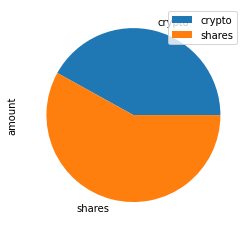

In [12]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True)

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of saving
savings_amount = float(df_savings.sum())

# Validate saving health
goal_value =emergency_fund - savings_amount
    
if savings_amount > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
    
if savings_amount == emergency_fund:
    print("Congratulations! You have reached your emergency fund goal.")
    
else:
    print(f"You are {goal_value} dollars away from reaching your emergency fund goal.")

Congratulations! You have enough money in your emergency fund.
You are -28939.030017999998 dollars away from reaching your emergency fund goal.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-09-19', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-09-19', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]
timeframe = "1D"

# Reorganize the DataFrame
df_stock_data = api.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    ).df
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)
# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])
# Display sample data
df_stock_data.head()

AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2017-09-19 04:00:00+00:00  109.91  109.9600  109.785  109.80  1407196   
2017-09-20 04:00:00+00:00  109.84  109.9194  109.590  109.71  1356768   
2017-09-21 04:00:00+00:00  109.82  109.8500  109.680  109.69  2210883   
2017-09-22 04:00:00+00:00  109.86  109.9000  109.750  109.77  1461846   
2017-09-25 04:00:00+00:00  109.85  110.0400  109.820  110.03  3937638   

                                                      SPY                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2017-09-19 04:00:00+00:00        7601  109.836548  250.00  250.0700  249.600   
2017-09-20 04:00:00+00:00        6947  109.772539  250.07  250.1900  248.920   
2017-09-21 04:00:00+00:00        7113  109.756916  249.87  249.9800  249.185   
2017-09-22 04:00:00+00:00        6970  109.810087  249.06  249.6300  249.020   
2017-09-25 04:00:00+00:00       13206  109.962143  249.16  249.5532  248.080   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2017-09-19 04:00:00+00:00  249.97  47108148      125388  249.877595  
2017-09-20 04:00:00+00:00  250.06  59574083      191405  249.816207  
2017-09-21 04:00:00+00:00  249.39  48211398      136973  249.610947  
2017-09-22 04:00:00+00:00  249.44  51214032      139814  249.361126  
2017-09-25 04:00:00+00:00  248.93  57064357      192970  248.875942

In [16]:
# Set number of simulations
num_sims = 1000
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_portfolio = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_portfolio.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2017-09-19 04:00:00+00:00  109.91  109.9600  109.785  109.80  1407196   
2017-09-20 04:00:00+00:00  109.84  109.9194  109.590  109.71  1356768   
2017-09-21 04:00:00+00:00  109.82  109.8500  109.680  109.69  2210883   
2017-09-22 04:00:00+00:00  109.86  109.9000  109.750  109.77  1461846   
2017-09-25 04:00:00+00:00  109.85  110.0400  109.820  110.03  3937638   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-09-19 04:00:00+00:00        7601  109.836548          NaN  250.00   
2017-09-20 04:00:00+00:00        6947  109.772539    -0.000820  250.07   
2017-09-21 04:00:00+00:00        7113  109.756916    -0.000182  249.87   
2017-09-22 04:00:00+00:00        6970  109.810087     0.000729  249.06   
2017-09-25 04:00:00+00:00       13206  109.962143     0.002369  249.16   

                                                                            \
                               high      low   close    volume trade_count   
timestamp                                                                    
2017-09-19 04:00:00+00:00  250.0700  249.600  249.97  47108148      125388   
2017-09-20 04:00:00+00:00  250.1900  248.920  250.06  59574083      191405   
2017-09-21 04:00:00+00:00  249.9800  249.185  249.39  48211398      136973   
2017-09-22 04:00:00+00:00  249.6300  249.020  249.44  51214032      139814   
2017-09-25 04:00:00+00:00  249.5532  248.080  248.93  57064357      192970   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-09-19 04:00:00+00:00  249.877595          NaN  
2017-09-20 04:00:00+00:00  249.816207     0.000360  
2017-09-21 04:00:00+00:00  249.610947    -0.002679  
2017-09-22 04:00:00+00:00  249.361126     0.000200  
2017-09-25 04:00:00+00:00  248.875942    -0.002045

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 110.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 120.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 130.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 140.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 150.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 160.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 170.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 180.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 190.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 200.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 210.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 220.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 230.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 240.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 250.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 260.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 270.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 280.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 290.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 300.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 310.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 320.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 330.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 340.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 350.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 360.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 370.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 380.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 390.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 400.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 410.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 420.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 430.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 440.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 450.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 460.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 470.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 480.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 490.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 500.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 510.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 520.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 530.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 540.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 550.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 560.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 570.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 580.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 590.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 600.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 610.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 620.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 630.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 640.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 650.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 660.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 670.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 680.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 690.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 700.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 710.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 720.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 730.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 740.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 750.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 760.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 770.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 780.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 790.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 800.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 810.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 820.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 830.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 840.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 850.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 860.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 870.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 880.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 890.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 900.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 910.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 920.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 930.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 940.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 950.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 960.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 970.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 980.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 990.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006941,1.001038,0.994326,0.997613,0.982787,0.996010,0.992475,0.990073,0.987505,0.985927,...,1.010427,1.000261,1.005423,0.993504,1.013906,0.990734,1.005788,1.003660,0.986427,1.001666
2,0.999367,1.017799,1.001799,0.983329,0.986833,0.989305,0.987197,0.990293,0.981364,0.986376,...,1.001501,0.999236,1.005170,1.002815,1.018319,0.986172,1.005360,1.012555,0.980889,1.011134
3,1.001953,1.021417,1.003908,0.970309,0.987319,0.989938,0.990356,0.972171,0.997658,0.985354,...,0.991919,0.998652,1.006922,0.999936,1.022665,0.981342,1.006525,1.009061,0.983235,1.013233
4,0.990175,1.027193,1.006791,0.969708,0.998797,1.002751,0.977905,0.967284,0.983938,0.972506,...,0.992841,1.007648,1.005849,1.012535,1.024155,0.977632,1.004908,0.994616,0.980582,1.009303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.693793,5.630381,1.131268,3.788308,1.946606,2.024948,2.963134,1.852337,5.741939,3.026557,...,5.756060,3.966603,4.258995,3.237972,4.226074,12.629503,6.771799,6.180380,2.481931,6.109177
7557,2.687700,5.578716,1.131962,3.770953,1.970332,2.024004,2.914414,1.861327,5.744076,3.070673,...,5.744018,3.962308,4.220880,3.257849,4.251665,12.808083,6.771220,6.148411,2.486600,6.112014
7558,2.691567,5.546633,1.111961,3.760375,1.965399,2.030073,2.964562,1.890456,5.776996,3.089030,...,5.779251,3.987893,4.243034,3.272753,4.208785,12.873388,6.774161,6.148228,2.503095,6.074018
7559,2.712562,5.518014,1.110836,3.741653,1.952417,2.016972,2.950624,1.878493,5.785560,3.051790,...,5.770388,4.014260,4.285361,3.275784,4.181331,12.838886,6.784288,6.093034,2.494052,6.095478


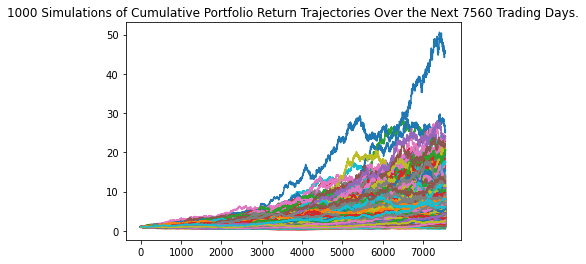

In [22]:
# Plot simulation outcomes
line_plot = MC_portfolio.plot_simulation()

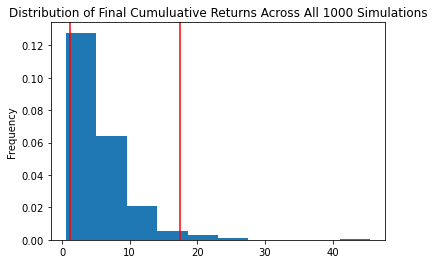

In [23]:
# Plot probability distribution and confidence intervals
dist_plot = MC_portfolio.plot_distribution()

### Retirement Analysis

In [24]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_portfolio.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1000.000000
mean               5.596039
std                4.234247
min                0.549663
25%                2.822726
50%                4.327780
75%                7.134211
max               45.556045
95% CI Lower       1.121921
95% CI Upper      17.398465
Name: 7560, dtype: float64


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [25]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $22438.42 and $347969.3


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [26]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*initial_investment,2)
ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $33657.63 and $521953.94


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [27]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_agg = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 1000,
    num_trading_days = 252*5)
MC_agg.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2017-09-19 04:00:00+00:00  109.91  109.9600  109.785  109.80  1407196   
2017-09-20 04:00:00+00:00  109.84  109.9194  109.590  109.71  1356768   
2017-09-21 04:00:00+00:00  109.82  109.8500  109.680  109.69  2210883   
2017-09-22 04:00:00+00:00  109.86  109.9000  109.750  109.77  1461846   
2017-09-25 04:00:00+00:00  109.85  110.0400  109.820  110.03  3937638   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-09-19 04:00:00+00:00        7601  109.836548          NaN  250.00   
2017-09-20 04:00:00+00:00        6947  109.772539    -0.000820  250.07   
2017-09-21 04:00:00+00:00        7113  109.756916    -0.000182  249.87   
2017-09-22 04:00:00+00:00        6970  109.810087     0.000729  249.06   
2017-09-25 04:00:00+00:00       13206  109.962143     0.002369  249.16   

                                                                            \
                               high      low   close    volume trade_count   
timestamp                                                                    
2017-09-19 04:00:00+00:00  250.0700  249.600  249.97  47108148      125388   
2017-09-20 04:00:00+00:00  250.1900  248.920  250.06  59574083      191405   
2017-09-21 04:00:00+00:00  249.9800  249.185  249.39  48211398      136973   
2017-09-22 04:00:00+00:00  249.6300  249.020  249.44  51214032      139814   
2017-09-25 04:00:00+00:00  249.5532  248.080  248.93  57064357      192970   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-09-19 04:00:00+00:00  249.877595          NaN  
2017-09-20 04:00:00+00:00  249.816207     0.000360  
2017-09-21 04:00:00+00:00  249.610947    -0.002679  
2017-09-22 04:00:00+00:00  249.361126     0.000200  
2017-09-25 04:00:00+00:00  248.875942    -0.002045

In [28]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_agg.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 110.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 120.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 130.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 140.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 150.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 160.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 170.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 180.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 190.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 200.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 210.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 220.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 230.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 240.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 250.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 260.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 270.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 280.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 290.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 300.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 310.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 320.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 330.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 340.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 350.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 360.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 370.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 380.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 390.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 400.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 410.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 420.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 430.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 440.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 450.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 460.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 470.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 480.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 490.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 500.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 510.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 520.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 530.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 540.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 550.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 560.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 570.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 580.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 590.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 600.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 610.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 620.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 630.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 640.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 650.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 660.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 670.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 680.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 690.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 700.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 710.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 720.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 730.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 740.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 750.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 760.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 770.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 780.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 790.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 800.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 810.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 820.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 830.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 840.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 850.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 860.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 870.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 880.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 890.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 900.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 910.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 920.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 930.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 940.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 950.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 960.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 970.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 980.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 990.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988665,0.999595,1.011940,1.001577,0.993479,0.999535,1.001983,1.004887,1.008056,0.999062,...,0.998958,1.001069,1.000411,0.999361,0.997407,1.002036,0.994919,1.009431,1.007923,1.005416
2,0.990452,0.991705,1.006682,1.014412,0.996281,1.005482,0.996211,1.006910,1.013016,1.006617,...,0.995665,0.990655,0.998296,0.999256,1.000361,1.012019,0.992968,1.007061,1.007979,1.014711
3,0.995070,0.984159,1.008503,1.007352,0.994998,1.000652,1.001114,1.000788,1.015264,1.000002,...,0.992919,0.997359,0.999677,0.996508,0.992733,1.020699,0.988877,1.001923,1.002800,1.020837
4,0.994224,0.977893,1.011280,1.008870,1.005412,1.006476,0.999174,0.990265,1.015938,1.003641,...,0.992265,0.994175,0.997112,1.002287,0.988165,1.021923,0.986602,1.005896,1.005885,1.023962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.394644,1.111462,1.279404,1.225692,1.156390,1.212355,0.953238,1.211407,1.071010,1.030638,...,1.472039,0.843899,1.213690,1.607142,1.705906,1.305253,1.306270,0.904114,0.994928,1.352264
1257,1.402178,1.117775,1.272066,1.235591,1.159768,1.210546,0.944409,1.222147,1.070345,1.028682,...,1.463017,0.848942,1.208116,1.593585,1.700488,1.300927,1.292266,0.902123,0.991655,1.358891
1258,1.400710,1.113597,1.268766,1.242726,1.163795,1.221745,0.946995,1.222759,1.078445,1.026613,...,1.471266,0.850052,1.213014,1.600089,1.713364,1.297343,1.270035,0.902653,0.982132,1.366232
1259,1.407818,1.114189,1.270006,1.235104,1.173026,1.217989,0.944301,1.223615,1.067260,1.030809,...,1.465325,0.856565,1.227911,1.600717,1.734515,1.314671,1.259815,0.904468,0.983833,1.372685


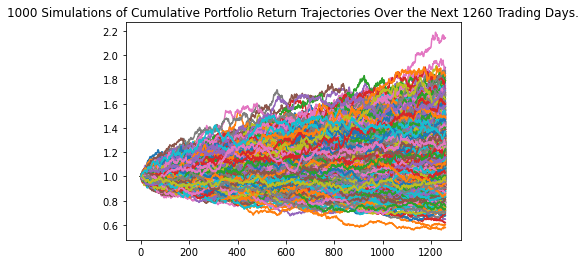

In [29]:
# Plot simulation outcomes
agg_line_plot = MC_agg.plot_simulation()

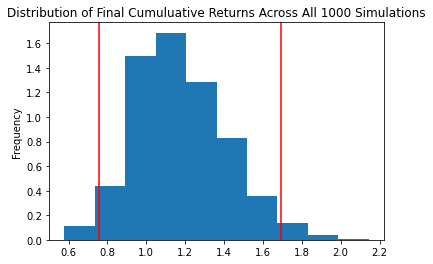

In [30]:
# Plot probability distribution and confidence intervals
agg_dist_plot = MC_agg.plot_distribution()

In [31]:
# Fetch summary statistics from the Monte Carlo simulation results
agg_tbl = MC_agg.summarize_cumulative_return()

# Print summary statistics
print(agg_tbl)

count           1000.000000
mean               1.177928
std                0.236484
min                0.578451
25%                1.007264
50%                1.154009
75%                1.324468
max                2.143955
95% CI Lower       0.754542
95% CI Upper       1.690656
Name: 1260, dtype: float64


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [32]:
# Set initial investment
initial_investment = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
agg_ci_lower_five = round(agg_tbl[8]*initial_investment,2)
agg_ci_upper_five = round(agg_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${agg_ci_lower_five} and ${agg_ci_upper_five}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 5 years will end within in the range of $75454.18 and $169065.59


### Ten Years Retirement Option

In [33]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_spy = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 1000,
    num_trading_days = 252*10)

# Print the simulation input data
MC_spy.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2017-09-19 04:00:00+00:00  109.91  109.9600  109.785  109.80  1407196   
2017-09-20 04:00:00+00:00  109.84  109.9194  109.590  109.71  1356768   
2017-09-21 04:00:00+00:00  109.82  109.8500  109.680  109.69  2210883   
2017-09-22 04:00:00+00:00  109.86  109.9000  109.750  109.77  1461846   
2017-09-25 04:00:00+00:00  109.85  110.0400  109.820  110.03  3937638   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-09-19 04:00:00+00:00        7601  109.836548          NaN  250.00   
2017-09-20 04:00:00+00:00        6947  109.772539    -0.000820  250.07   
2017-09-21 04:00:00+00:00        7113  109.756916    -0.000182  249.87   
2017-09-22 04:00:00+00:00        6970  109.810087     0.000729  249.06   
2017-09-25 04:00:00+00:00       13206  109.962143     0.002369  249.16   

                                                                            \
                               high      low   close    volume trade_count   
timestamp                                                                    
2017-09-19 04:00:00+00:00  250.0700  249.600  249.97  47108148      125388   
2017-09-20 04:00:00+00:00  250.1900  248.920  250.06  59574083      191405   
2017-09-21 04:00:00+00:00  249.9800  249.185  249.39  48211398      136973   
2017-09-22 04:00:00+00:00  249.6300  249.020  249.44  51214032      139814   
2017-09-25 04:00:00+00:00  249.5532  248.080  248.93  57064357      192970   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-09-19 04:00:00+00:00  249.877595          NaN  
2017-09-20 04:00:00+00:00  249.816207     0.000360  
2017-09-21 04:00:00+00:00  249.610947    -0.002679  
2017-09-22 04:00:00+00:00  249.361126     0.000200  
2017-09-25 04:00:00+00:00  248.875942    -0.002045

In [34]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_spy.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 110.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 120.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 130.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 140.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 150.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 160.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 170.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 180.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 190.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 200.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 210.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 220.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 230.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 240.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 250.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 260.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 270.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 280.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 290.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 300.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 310.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 320.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 330.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 340.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 350.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 360.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 370.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 380.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 390.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 400.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 410.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 420.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 430.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 440.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 450.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 460.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 470.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 480.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 490.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 500.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 510.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 520.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 530.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 540.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 550.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 560.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 570.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 580.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 590.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 600.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 610.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 620.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 630.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 640.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 650.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 660.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 670.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 680.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 690.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 700.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 710.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 720.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 730.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 740.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 750.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 760.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 770.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 780.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 790.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 800.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 810.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 820.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 830.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 840.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 850.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 860.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 870.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 880.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 890.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 900.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 910.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 920.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 930.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 940.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 950.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 960.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 970.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 980.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

Running Monte Carlo simulation number 990.


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992301,0.979066,1.000018,0.989731,0.993536,0.987581,0.984815,1.013994,0.992833,0.984265,...,0.986096,0.998913,0.988896,1.032015,1.006431,1.009004,0.991488,0.999092,0.985250,0.999152
2,0.987977,0.962529,0.993486,0.990079,0.968962,0.977486,0.976844,1.008498,0.999527,0.988632,...,0.986031,0.998819,0.992218,1.040706,1.006394,0.993875,0.988754,1.012849,1.003560,1.014219
3,0.981680,0.971978,0.995352,0.981243,0.956506,0.984017,0.977707,1.000685,0.987313,0.982432,...,0.969190,0.998157,0.981453,1.048416,0.993469,1.008399,0.991900,0.993354,1.017170,1.019638
4,0.971411,0.965663,1.001799,0.987398,0.960019,0.978411,0.997567,0.998195,0.997606,0.985330,...,0.976766,1.001552,0.983533,1.054741,0.994392,1.022051,0.974487,1.003865,1.039144,1.028285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.128223,2.531912,1.521776,0.919070,1.532841,0.728428,1.512697,1.258829,2.202069,1.716167,...,0.453572,2.679557,0.892955,2.210845,1.525351,0.647427,1.176626,1.710083,1.319938,2.542141
2517,4.089168,2.551147,1.520332,0.913910,1.555226,0.740009,1.507975,1.257670,2.234223,1.711716,...,0.453296,2.658187,0.900184,2.224893,1.517717,0.643002,1.169528,1.719970,1.334227,2.528252
2518,4.079226,2.557562,1.523496,0.902970,1.556516,0.754468,1.516834,1.269682,2.221029,1.733553,...,0.447510,2.667515,0.904166,2.209591,1.544187,0.656229,1.158138,1.710010,1.348618,2.529147
2519,4.063717,2.541542,1.503244,0.903865,1.555136,0.753120,1.516662,1.249070,2.182189,1.748182,...,0.453736,2.676536,0.902093,2.208736,1.534301,0.656009,1.168183,1.740256,1.369520,2.549660


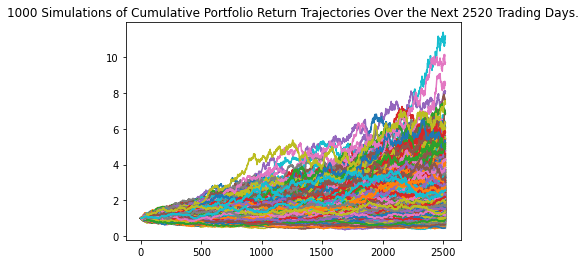

In [35]:
# Plot simulation outcomes
spy_line_plot = MC_spy.plot_simulation()

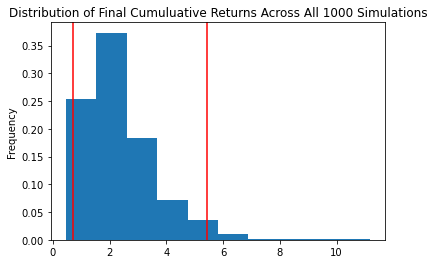

In [36]:
# Plot probability distribution and confidence intervals
spy_dist_plot = MC_spy.plot_distribution()

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
spy_tbl = MC_spy.summarize_cumulative_return()

# Print summary statistics
print(spy_tbl)

count           1000.000000
mean               2.357250
std                1.262612
min                0.460422
25%                1.489254
50%                2.075543
75%                2.968875
max               11.177427
95% CI Lower       0.719609
95% CI Upper       5.426527
Name: 2520, dtype: float64


C:\Users\dymde\Downloads\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main (1)\UTOR-VIRT-FIN-PT-08-2022-U-LOLC-main\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [38]:
# Set initial investment
initial_investment = 250000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
spy_ci_lower_ten = round(spy_tbl[8]*initial_investment,2)
spy_ci_upper_ten = round(spy_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${spy_ci_lower_ten} and ${spy_ci_upper_ten}")

There is a 95% chance that an initial investment of $250000 in the portfolio over the next 10 years will end within in the range of $179902.22 and $1356631.71


In [40]:
# Even weighted stocks
print("Even weighted stocks")
print(f"There is a 95% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")
print("*"*50)

# 60% for AGG
print("60% for AGG")
print(f"There is a 95% chance that an initial investment of $100,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${agg_ci_lower_five} and ${agg_ci_upper_five}.")
print("*"*50)

# 80% for SPY
print("80% for SPY")
print(f"There is a 95% chance that an initial investment of $250,000 in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${spy_ci_lower_ten} and ${spy_ci_upper_ten}.")
print("*"*50)



Even weighted stocks
There is a 95% chance that an initial investment of $20,000 in the portfolio over the next 5 years will end within in the range of $33657.63 and $521953.94.
**************************************************
60% for AGG
There is a 95% chance that an initial investment of $100,000 in the portfolio over the next 5 years will end within in the range of $75454.18 and $169065.59.
**************************************************
80% for SPY
There is a 95% chance that an initial investment of $250,000 in the portfolio over the next 10 years will end within in the range of $179902.22 and $1356631.71.
**************************************************
